In [1]:
from dask.distributed import Client
client = Client()  # Esto lanza el scheduler automáticamente


In [ ]:
import pandas as pd
import featuretools as ft
from featuretools.primitives import (
    Month, Year,
    Lag, RollingMean,
    TimeSincePrevious, TimeSince, Diff,
    Mean, Median, Std, Max, Min,
    PercentTrue, Any, All,
    NUniqueDays, NumConsecutiveGreaterMean
)

# 📥 1. Cargar dataset
df = pd.read_csv("finalitoul_filtrado.csv")
df['periodo'] = pd.to_datetime(df['periodo'])

# 🧪 2. Sample estratificado (5% por mes)
df_sample = df.groupby("periodo").apply(
    lambda x: x.sample(frac=0.05, random_state=42)
).reset_index(drop=True)

print("✅ Sample creado con shape:", df_sample.shape)
print(df_sample.head())

# 🏗 3. Crear EntitySet
es = ft.EntitySet(id="ventas_sampled")

es = es.add_dataframe(
    dataframe_name="ventas",
    dataframe=df_sample,
    index="venta_id",
    make_index=True,
    time_index="periodo"
)

# 🔗 4. Normalizar entidades
es = es.normalize_dataframe("ventas", "clientes", index="customer_id")
es = es.normalize_dataframe("ventas", "productos", index="product_id")

# 🧠 5. Definir primitivas
transform_primitives = [
    Month(), Year(),
    Lag(), RollingMean(),
    TimeSincePrevious(), TimeSince(), Diff()
]

aggregation_primitives = [
    Mean(), Median(), Std(), Max(), Min(),
    PercentTrue(), Any(), All(),
    NUniqueDays(), NumConsecutiveGreaterMean()
]

# ⚙️ 6. Aplicar Deep Feature Synthesis con chunking
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="ventas",
    trans_primitives=transform_primitives,
    agg_primitives=aggregation_primitives,
    max_depth=2,
    #n_jobs=-1,
    #chunk_size=1000,  # ⚠️ clave para no matar la RAM
    verbose=True
)

print("✅ Feature matrix generada:", feature_matrix.shape)
print(feature_matrix.head())

# 💾 7. Guardar resultados
feature_matrix.to_csv("features_sample_5porciento.csv")
print("📁 Features exportadas como features_sample_2porciento.csv")
  

C:\Users\waldo\AppData\Local\Temp\ipykernel_33900\2604494180.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = df.groupby("periodo").apply(


✅ Sample creado con shape: (473040, 13)
   customer_id  product_id    periodo  plan_precios_cuidados  \
0        10539       20100 2017-01-01                    0.0   
1        10101       20008 2017-01-01                    0.0   
2        10238       21224 2017-01-01                    0.0   
3        10110       20230 2017-01-01                    0.0   
4        10566       21140 2017-01-01                    0.0   

   cust_request_qty  cust_request_tn       tn  stock_final   cat1      cat2  \
0               0.0          0.00000  0.00000          0.0  FOODS  ADEREZOS   
1               1.0          0.31368  0.31368          0.0     HC   VAJILLA   
2               0.0          0.00000  0.00000          0.0     PC      DEOS   
3               1.0          0.07351  0.07351          0.0     PC   CABELLO   
4               0.0          0.00000  0.00000          0.0     PC     PIEL1   

             cat3     brand  sku_size  
0         Mostaza  MOSTAZA1        60  
1           Opaco   

c:\Users\waldo\miniconda3\envs\featuretools_env\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\waldo\miniconda3\envs\featuretools_env\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\waldo\miniconda3\envs\featuretools_env\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\waldo\miniconda3\envs\featuretools_env\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWa

Built 152 features
Elapsed: 00:00 | Progress:   0%|          

c:\Users\waldo\miniconda3\envs\featuretools_env\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function max at 0x0000028373E92980> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ).agg(to_agg)
c:\Users\waldo\miniconda3\envs\featuretools_env\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function min at 0x0000028373E92AC0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  ).agg(to_agg)
c:\Users\waldo\miniconda3\envs\featuretools_env\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function mean at 0x0000028373E93380> is cur

Elapsed: 00:09 | Progress:  18%|█▊        

c:\Users\waldo\miniconda3\envs\featuretools_env\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function max at 0x0000028373E92980> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ).agg(to_agg)
c:\Users\waldo\miniconda3\envs\featuretools_env\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function std at 0x0000028373E934C0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  ).agg(to_agg)
c:\Users\waldo\miniconda3\envs\featuretools_env\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function min at 0x0000028373E92AC0> is curr

Elapsed: 00:10 | Progress:  21%|██        

c:\Users\waldo\miniconda3\envs\featuretools_env\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function mean at 0x0000028373E93380> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ).agg(to_agg)
c:\Users\waldo\miniconda3\envs\featuretools_env\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function max at 0x0000028373E92980> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ).agg(to_agg)
c:\Users\waldo\miniconda3\envs\featuretools_env\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function min at 0x0000028373E92AC0> is c

Elapsed: 13:57 | Progress: 100%|██████████
✅ Feature matrix generada: (473040, 152)
          customer_id  product_id  plan_precios_cuidados  cust_request_qty  \
venta_id                                                                     
0               10539       20100                    0.0               0.0   
1               10101       20008                    0.0               1.0   
2               10238       21224                    0.0               0.0   
3               10110       20230                    0.0               1.0   
4               10566       21140                    0.0               0.0   

          cust_request_tn       tn  stock_final   cat1      cat2  \
venta_id                                                           
0                 0.00000  0.00000          0.0  FOODS  ADEREZOS   
1                 0.31368  0.31368          0.0     HC   VAJILLA   
2                 0.00000  0.00000          0.0     PC      DEOS   
3                 0.07351  0.

🌟 MAE (top 20):  0.0012
🌟 RMSE:         0.0735
🌟 R²:           0.9986


C:\Users\waldo\AppData\Local\Temp\ipykernel_33900\2134598708.py:48: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\waldo\miniconda3\envs\featuretools_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


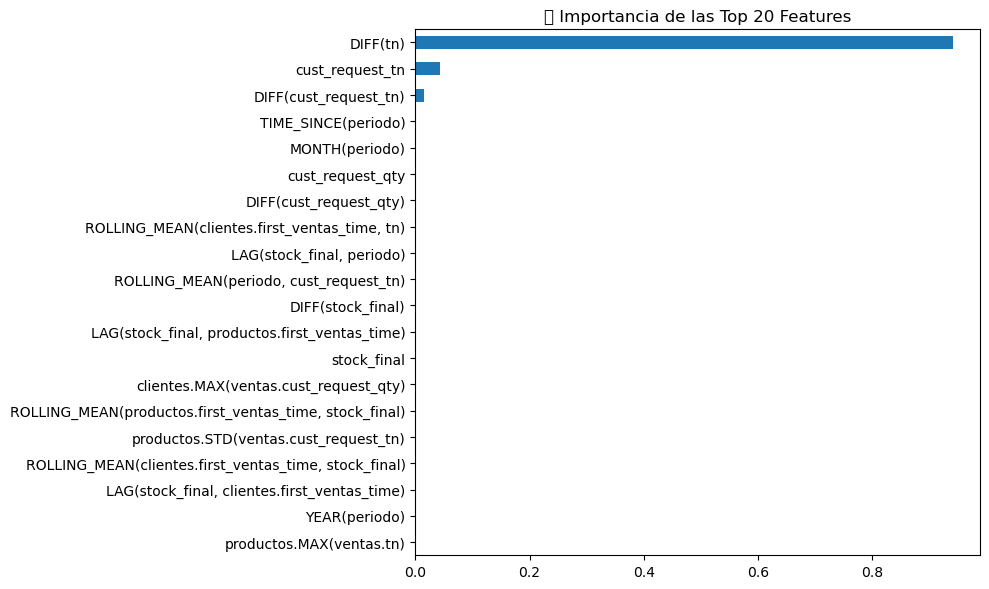

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 📥 1. Cargar dataset
df = pd.read_csv("features_sample_5porciento.csv", index_col=0)
y = df["tn"]
X = df.drop(columns=["tn"]).select_dtypes(include=[np.number]).fillna(0)

# 🧪 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🌲 3. Modelo completo para obtener importancias
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20).index.tolist()

# 📉 4. Reentrenar solo con top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

model_top = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model_top.fit(X_train_top, y_train)

y_pred_top = model_top.predict(X_test_top)

# 📊 5. Métricas
mae = mean_absolute_error(y_test, y_pred_top)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_top))
r2 = r2_score(y_test, y_pred_top)

print(f"🌟 MAE (top 20):  {mae:.4f}")
print(f"🌟 RMSE:         {rmse:.4f}")
print(f"🌟 R²:           {r2:.4f}")

# 📊 6. Gráfico
top_importances = pd.Series(model_top.feature_importances_, index=top_features)
plt.figure(figsize=(10, 6))
top_importances.sort_values().plot(kind="barh")
plt.title("🎯 Importancia de las Top 20 Features")
plt.tight_layout()
plt.show()


C:\Users\waldo\AppData\Local\Temp\ipykernel_33900\2890340514.py:46: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\waldo\miniconda3\envs\featuretools_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


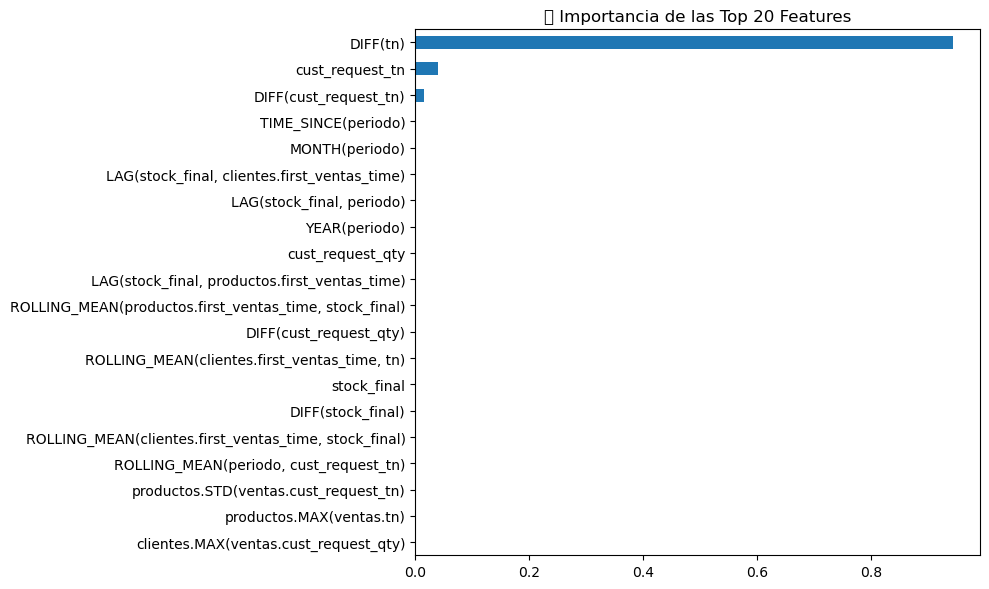

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 📥 1. Cargar dataset completo (con features creadas)
df = pd.read_csv("features_sample_5porciento.csv", index_col=0)

# 📥 2. Cargar dataset original (antes de featuretools) para saber qué columnas son originales
df_original = pd.read_csv("finalitoul_filtrado.csv")
original_features = df_original.columns.tolist()

# 🎯 3. Separar variable objetivo
y = df["tn"]
X = df.drop(columns=["tn"]).select_dtypes(include=[np.number]).fillna(0)

# 🧪 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🌲 5. Entrenar modelo para obtener importancias
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# 🔝 6. Obtener top 20 features más importantes
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20).index.tolist()

# 🧬 7. Combinar columnas originales + top features + target (filtrando solo las originales que siguen existiendo)
originales_en_df = [col for col in original_features if col in df.columns]
cols_finales = list(set(originales_en_df) | set(top_features) | {"tn"})
df_filtrado = df[cols_finales]


# 💾 8. Exportar
df_filtrado.to_csv("features_con_originales_y_top20.csv", index=False)

# 📊 9. Mostrar gráfico de importancia
top_importances = pd.Series(model.feature_importances_, index=X.columns)[top_features]
plt.figure(figsize=(10, 6))
top_importances.sort_values().plot(kind="barh")
plt.title("🎯 Importancia de las Top 20 Features")
plt.tight_layout()
plt.show()


In [8]:
df_filtrado

,cat3,DIFF(cust_request_qty),stock_final,"LAG(stock_final, productos.first_ventas_time)",cat2,sku_size,product_id,"LAG(stock_final, clientes.first_ventas_time)",DIFF(stock_final),"ROLLING_MEAN(clientes.first_ventas_time, stock_final)",...,MONTH(periodo),cat1,DIFF(tn),plan_precios_cuidados,cust_request_qty,YEAR(periodo),brand,productos.STD(ventas.cust_request_tn),"ROLLING_MEAN(clientes.first_ventas_time, tn)","ROLLING_MEAN(productos.first_ventas_time, stock_final)"
venta_id,,,,,,,,,,,,,,,,,,,,,
0,Mostaza,NaN,0.00000,NaN,ADEREZOS,60,20100,NaN,NaN,NaN,...,1,FOODS,NaN,0.0,0.0,2017,MOSTAZA1,3.807832,NaN,NaN
1,Opaco,1.0,0.00000,0.00000,VAJILLA,750,20008,0.00000,0.00000,0.000000,...,1,HC,0.31368,0.0,1.0,2017,LIMPIEX,2.460151,0.000000,0.000000
2,Aero,-1.0,0.00000,0.00000,DEOS,50,21224,0.00000,0.00000,0.000000,...,1,PC,-0.31368,0.0,0.0,2017,DEOS3,0.000408,0.156840,0.000000
3,ACONDICIONADOR,1.0,0.00000,0.00000,CABELLO,350,20230,0.00000,0.00000,0.000000,...,1,PC,0.07351,0.0,1.0,2017,SHAMPOO3,0.408960,0.104560,0.000000
4,Cara,-1.0,0.00000,0.00000,PIEL1,30,21140,0.00000,0.00000,0.000000,...,1,PC,-0.07351,0.0,0.0,2017,LANCOME,0.003014,0.129063,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473035,Mayonesa,1.0,0.00000,20.29602,ADEREZOS,240,20396,20.29602,-20.29602,19.524667,...,12,FOODS,0.15594,0.0,1.0,2019,NATURA,0.323192,0.042403,19.524667
473036,Polvo,0.0,45.13018,0.00000,ROPA LAVADO,800,20031,0.00000,45.13018,7.737983,...,12,HC,0.01878,0.0,1.0,2019,LIMPIEX,2.379361,0.053617,7.737983
473037,SHAMPOO,-1.0,16.53517,45.13018,CABELLO,750,20456,45.13018,-28.59501,21.808733,...,12,PC,-0.17472,0.0,0.0,2019,SHAMPOO1,0.024523,0.110220,21.808733


In [9]:
print(df_filtrado.columns.tolist())


['cat3', 'DIFF(cust_request_qty)', 'stock_final', 'LAG(stock_final, productos.first_ventas_time)', 'cat2', 'sku_size', 'product_id', 'LAG(stock_final, clientes.first_ventas_time)', 'DIFF(stock_final)', 'ROLLING_MEAN(clientes.first_ventas_time, stock_final)', 'clientes.MAX(ventas.cust_request_qty)', 'LAG(stock_final, periodo)', 'ROLLING_MEAN(periodo, cust_request_tn)', 'customer_id', 'cust_request_tn', 'TIME_SINCE(periodo)', 'DIFF(cust_request_tn)', 'productos.MAX(ventas.tn)', 'tn', 'MONTH(periodo)', 'cat1', 'DIFF(tn)', 'plan_precios_cuidados', 'cust_request_qty', 'YEAR(periodo)', 'brand', 'productos.STD(ventas.cust_request_tn)', 'ROLLING_MEAN(clientes.first_ventas_time, tn)', 'ROLLING_MEAN(productos.first_ventas_time, stock_final)']


In [10]:
pd.DataFrame(df_filtrado.columns.tolist(), columns=["Columnas Conservadas"])


,Columnas Conservadas
0,cat3
1,DIFF(cust_request_qty)
2,stock_final
3,"LAG(stock_final, productos.first_ventas_time)"
4,cat2
5,sku_size
6,product_id
7,"LAG(stock_final, clientes.first_ventas_time)"
8,DIFF(stock_final)
9,"ROLLING_MEAN(clientes.first_ventas_time, stock..."


In [11]:
# Columnas originales que no están en el df con features
originales_perdidas = [col for col in original_features if col not in df.columns]
print("❌ Columnas originales que se perdieron en el proceso:")
print(originales_perdidas)


❌ Columnas originales que se perdieron en el proceso:
['periodo']


📌 Top 20 features más importantes:
 1. DIFF(tn)
 2. cust_request_tn
 3. DIFF(cust_request_tn)
 4. TIME_SINCE(periodo)
 5. MONTH(periodo)
 6. LAG(stock_final, clientes.first_ventas_time)
 7. LAG(stock_final, periodo)
 8. YEAR(periodo)
 9. cust_request_qty
10. LAG(stock_final, productos.first_ventas_time)
11. ROLLING_MEAN(productos.first_ventas_time, stock_final)
12. DIFF(cust_request_qty)
13. ROLLING_MEAN(clientes.first_ventas_time, tn)
14. stock_final
15. DIFF(stock_final)
16. ROLLING_MEAN(clientes.first_ventas_time, stock_final)
17. ROLLING_MEAN(periodo, cust_request_tn)
18. productos.STD(ventas.cust_request_tn)
19. productos.MAX(ventas.tn)
20. clientes.MAX(ventas.cust_request_qty)
⚠️ Columnas repetidas entre originales y top features: ['cust_request_qty', 'cust_request_tn', 'stock_final']
🔍 Columna faltante: {'cust_request_qty', 'cust_request_tn', 'stock_final'}
📐 Total esperado: 34, Total real: 31

✅ Dataset final tiene 31 columnas (esperadas: 33)
🧱 Columnas del dataset final: ['cus

C:\Users\waldo\AppData\Local\Temp\ipykernel_33900\1756445286.py:76: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\waldo\miniconda3\envs\featuretools_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


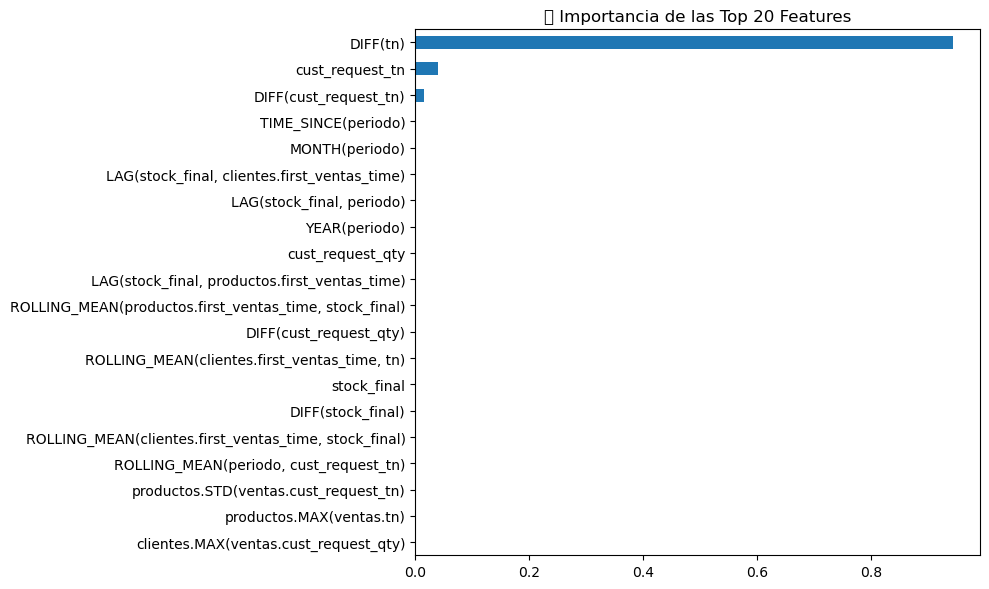

In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 📥 1. Cargar datasets
df_feat = pd.read_csv("features_sample_5porciento.csv", index_col=0)
df_orig = pd.read_csv("finalitoul_filtrado.csv")  # columnas originales

# 🎯 2. Definir variable objetivo y features numéricas del df_feat
y = df_feat["tn"]
X = df_feat.drop(columns=["tn"]).select_dtypes(include=[np.number]).fillna(0)

# 🧪 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 4. Entrenar modelo para sacar importancia de features
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# 🔝 5. Obtener top 20 features
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20).index.tolist()

# 📌 6. Mostrar y guardar top 20 features
print("📌 Top 20 features más importantes:")
for i, f in enumerate(top_features, 1):
    print(f"{i:2d}. {f}")
pd.Series(top_features, name="Top_Features").to_csv("top_20_features.csv", index=False)

# ✂️ 7. Recortar df_orig para que tenga misma cantidad de filas que df_feat
df_orig_recortado = df_orig.iloc[:len(df_feat)].copy()

# 🔁 8. Armar DataFrame final
top_features_df = df_feat[top_features].reset_index(drop=True)
target = df_feat[["tn"]].reset_index(drop=True).rename(columns={"tn": "tn1"})

df_orig_recortado = df_orig_recortado.reset_index(drop=True)

# 🚨 9. Verificar si hay nombres repetidos entre originales y top features
original_cols = set(df_orig_recortado.columns)
top_cols = set(top_features)
cols_repetidas = original_cols.intersection(top_cols)

if cols_repetidas:
    print(f"⚠️ Columnas repetidas entre originales y top features: {list(cols_repetidas)}")
    top_features_df = top_features_df.drop(columns=list(cols_repetidas), errors="ignore")

    # 🕵️‍♂️ Mostrar columna que se perdió
    total_esperado = len(df_orig.columns) + 20 + 1  # 13 originales + 20 top + 1 tn
    real = len(df_orig.columns) + len(top_features) - len(cols_repetidas) + 1
    columna_faltante = set(top_features) - set(top_features_df.columns)
    print(f"🔍 Columna faltante: {columna_faltante}")
    print(f"📐 Total esperado: {total_esperado}, Total real: {real}")



# ✅ 10. Concatenar sin repetir columnas
top_features_df = top_features_df.drop(columns=list(cols_repetidas), errors="ignore")
df_final = pd.concat([df_orig_recortado, top_features_df, target], axis=1)

# 📏 11. Mostrar cantidad final de columnas
print(f"\n✅ Dataset final tiene {df_final.shape[1]} columnas (esperadas: 33)")
print("🧱 Columnas del dataset final:", df_final.columns.tolist())

# 💾 12. Guardar dataset final
df_final.to_csv("features_final_con_13originales_y_top20.csv", index=False)

# 📊 13. Gráfico de importancia
top_importances = importances[top_features]
plt.figure(figsize=(10, 6))
top_importances.sort_values().plot(kind="barh")
plt.title("🎯 Importancia de las Top 20 Features")
plt.tight_layout()
plt.show()


In [25]:
print("📋 Columnas finales del dataset:")
for col in df_final.columns:
    print(f" - {col}")


📋 Columnas finales del dataset:
 - customer_id
 - product_id
 - periodo
 - plan_precios_cuidados
 - cust_request_qty
 - cust_request_tn
 - tn
 - stock_final
 - cat1
 - cat2
 - cat3
 - brand
 - sku_size
 - DIFF(tn)
 - DIFF(cust_request_tn)
 - TIME_SINCE(periodo)
 - MONTH(periodo)
 - LAG(stock_final, clientes.first_ventas_time)
 - LAG(stock_final, periodo)
 - YEAR(periodo)
 - LAG(stock_final, productos.first_ventas_time)
 - ROLLING_MEAN(productos.first_ventas_time, stock_final)
 - DIFF(cust_request_qty)
 - ROLLING_MEAN(clientes.first_ventas_time, tn)
 - DIFF(stock_final)
 - ROLLING_MEAN(clientes.first_ventas_time, stock_final)
 - ROLLING_MEAN(periodo, cust_request_tn)
 - productos.STD(ventas.cust_request_tn)
 - productos.MAX(ventas.tn)
 - clientes.MAX(ventas.cust_request_qty)
 - tn1


In [22]:
# 🔎 14. Verificar si hay columnas repetidas en el df_final
duplicadas = df_final.columns[df_final.columns.duplicated()].tolist()
if duplicadas:
    print(f"⚠️ Columnas duplicadas en el dataset final: {duplicadas}")
else:
    print("✅ No hay columnas duplicadas en el dataset final.")


✅ No hay columnas duplicadas en el dataset final.


In [23]:
import pandas as pd

df_orig = pd.read_csv("finalitoul_filtrado.csv")
print("📋 Columnas del dataset original:")
for col in df_orig.columns:
    print(f" - {col}")


📋 Columnas del dataset original:
 - customer_id
 - product_id
 - periodo
 - plan_precios_cuidados
 - cust_request_qty
 - cust_request_tn
 - tn
 - stock_final
 - cat1
 - cat2
 - cat3
 - brand
 - sku_size


In [28]:
import pandas as pd
import featuretools as ft
from featuretools.primitives import (
    Month, Year,
    Lag, RollingMean,
    TimeSincePrevious, TimeSince, Diff,
    Mean, Median, Std, Max, Min,
    PercentTrue, Any, All,
    NUniqueDays, NumConsecutiveGreaterMean
)
import joblib

# 📥 1. Cargar dataset original completo
df = pd.read_csv("finalitoul_filtrado.csv")
df['periodo'] = pd.to_datetime(df['periodo'])

# 🏗 2. Crear EntitySet
es = ft.EntitySet(id="ventas_completo")
es = es.add_dataframe(
    dataframe_name="ventas",
    dataframe=df,
    index="venta_id",
    make_index=True,
    time_index="periodo"
)
es = es.normalize_dataframe("ventas", "clientes", index="customer_id")
es = es.normalize_dataframe("ventas", "productos", index="product_id")

# 🧠 3. Definir primitivas
transform_primitives = [
    Month(), Year(),
    Lag(), RollingMean(),
    TimeSincePrevious(), TimeSince(), Diff()
]
aggregation_primitives = [
    Mean(), Median(), Std(), Max(), Min(),
    PercentTrue(), Any(), All(),
    NUniqueDays(), NumConsecutiveGreaterMean()
]

# ⚙️ 4. Aplicar DFS con max_features=20
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="ventas",
    trans_primitives=transform_primitives,
    agg_primitives=aggregation_primitives,
    max_depth=2,
    max_features=20,
    verbose=True
)

# 🧪 5. Mostrar resumen de features generadas
print("\n🧬 Top 20 Features Generadas:")
for i, feat in enumerate(feature_defs):
    print(f"{i+1}. {feat.get_name()}")
    print(f"   → {feat}")

# 💾 6. Guardar definiciones de features
joblib.dump(feature_defs, "feature_defs_top20.pkl")
print("\n💾 Guardado: feature_defs_top20.pkl")

# 🧬 7. Agregar features al dataset original
feature_matrix = feature_matrix.reset_index(drop=True)
df_final = pd.concat([df.reset_index(drop=True), feature_matrix], axis=1)

# 💾 8. Exportar CSV
df_final.to_csv("finalitoul_filtrado_con_top20_features.csv", index=False)
print(f"✅ Exportado CSV con {df_final.shape[1]} columnas.")




c:\Users\waldo\miniconda3\envs\featuretools_env\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\waldo\miniconda3\envs\featuretools_env\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\waldo\miniconda3\envs\featuretools_env\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\waldo\miniconda3\envs\featuretools_env\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWa

Built 20 features


c:\Users\waldo\miniconda3\envs\featuretools_env\Lib\site-packages\featuretools\synthesis\dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  trans_primitives: ['month', 'rolling_mean', 'time_since', 'time_since_previous', 'year']
  agg_primitives: ['all', 'any', 'max', 'mean', 'median', 'min', 'n_unique_days', 'num_consecutive_greater_mean', 'percent_true', 'std']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


Elapsed: 01:01 | Progress: 100%|██████████

🧬 Top 20 Features Generadas:
1. customer_id
   → <Feature: customer_id>
2. product_id
   → <Feature: product_id>
3. plan_precios_cuidados
   → <Feature: plan_precios_cuidados>
4. cust_request_qty
   → <Feature: cust_request_qty>
5. cust_request_tn
   → <Feature: cust_request_tn>
6. tn
   → <Feature: tn>
7. stock_final
   → <Feature: stock_final>
8. cat1
   → <Feature: cat1>
9. cat2
   → <Feature: cat2>
10. cat3
   → <Feature: cat3>
11. brand
   → <Feature: brand>
12. sku_size
   → <Feature: sku_size>
13. DIFF(cust_request_qty)
   → <Feature: DIFF(cust_request_qty)>
14. DIFF(cust_request_tn)
   → <Feature: DIFF(cust_request_tn)>
15. DIFF(plan_precios_cuidados)
   → <Feature: DIFF(plan_precios_cuidados)>
16. DIFF(sku_size)
   → <Feature: DIFF(sku_size)>
17. DIFF(stock_final)
   → <Feature: DIFF(stock_final)>
18. DIFF(tn)
   → <Feature: DIFF(tn)>
19. LAG(brand, periodo)
   → <Feature: LAG(brand, periodo)>
20. LAG(cat1, periodo)
   → <Feature: LA